In [15]:
import os
import glob
import sys
import numpy as np
import cv2


def cast_uint8_float64(imgs):
    H, W = imgs[0].shape
    L = len(imgs)
    result = np.zeros((H*W, L))
    for i, img in enumerate(imgs):
        temp = img.astype(np.float64) / 255
        result[:, i] = temp.reshape(H*W, )
    return np.array(result)

def get_file_list(path_dir):
    files = os.listdir(path_dir)
    return [file for file in files if file.endswith(".pgm")]

def read_imgs(path_dir):
    files = get_file_list(path_dir)
    files.sort()
    imgs = []
    for file in files:
        imgs.append(cv2.imread(path_dir+'/'+file, -1))
    return cast_uint8_float64(imgs)

def cal_number_of_PC(input_percentage, S):
    total = S.sum()
    sum = 0
    for i, sv in enumerate(S):
        sum += sv
        if sum/total >= input_percentage:
            return i+1


def step1_print(input_percentage, selected_dimension):
    print('##########  STEP 1  ##########')
    print(f"Input Percentage: {input_percentage}")
    print(f"Selected Dimension: {selected_dimension}")

In [16]:
input_percentage = 0.95 #float(sys.argv[1])
STUDENT_CODE = '2019193016'
FILE_NAME = 'output.txt'

if not os.path.exists(STUDENT_CODE) :
    os.mkdir(STUDENT_CODE)
f = open(os.path.join(STUDENT_CODE, FILE_NAME), 'w')

path_dir = 'faces_training'

imgs = read_imgs(path_dir)
mean_img = np.ndarray((len(imgs),1))
for i in range(len(imgs[0])):
    mean_img[i] = imgs[i, :].mean()

zero_mean_imgs =np.subtract(imgs, mean_img)

print(zero_mean_imgs.shape)
U,S,V = np.linalg.svd(zero_mean_imgs, full_matrices = False)

selected_dimension = cal_number_of_PC(input_percentage, S)
step1_print(input_percentage, selected_dimension)


(32256, 39)


LinAlgError: SVD did not converge

In [3]:
truncated_U = U[:, :selected_dimension]

for i in range(len(truncated_U)):
    mean_img[i] = imgs[i, :].mean()

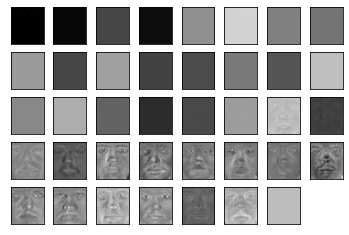

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
rows, cols = 5, 8
axes = []
for i in range(39):
    # plt.imshow((U[:,i]).reshape(192,168), cmap = 'gray')
    # plt.show()
    temp = fig.add_subplot(rows, cols, i+1)
    temp.imshow((U[:,i]).reshape(192,168), cmap = 'gray')
    temp.set_xticks([]), temp.set_yticks([])
plt.show()

In [ ]:
plt.imshow((U[:,0]).reshape(192,168), cmap = 'gray')
plt.show()

In [14]:
zero_mean_imgs.mean()

-inf